# **TP Final Integrador**
- Tema Diabetes
- Fuente [Diabetes en los ultimos 10años](https://www.kaggle.com/datasets/jimschacko/10-years-diabetes-dataset)
- Integrante : Diego Antonio Pizza


# Contexto
El conjunto de datos representa 10 años (1999-2008) de atención clínica en 130 hospitales y redes de entrega integradas en los Estados Unidos. Incluye más de 50 características que representan resultados de pacientes y hospitales. La información fue extraída de la base de datos para encuentros que cumplían con los siguientes criterios:

Encuentro de Hospitalización: Es un encuentro de hospitalización, es decir, una admisión hospitalaria.

Encuentro Diabético: Es un encuentro durante el cual se ingresó cualquier tipo de diabetes en el sistema como diagnóstico.

Duración de la Estancia: La duración de la estancia fue de al menos 1 día y como máximo 14 días.

Pruebas de Laboratorio: Se realizaron pruebas de laboratorio durante el encuentro.

Administración de Medicamentos: Se administraron medicamentos durante el encuentro.

Los datos contienen atributos como número de paciente, raza, género, edad, tipo de admisión, tiempo en el hospital, especialidad médica del médico que admite, número de pruebas de laboratorio realizadas, resultado de la prueba de HbA1c, diagnóstico, número de medicamentos, medicamentos para la diabetes, número de visitas ambulatorias, hospitalarias y de emergencia en el año anterior a la hospitalización, etc.

Además, hay 24 características relacionadas con medicamentos específicos, como metformina, repaglinida, nateglinida, clorpropamida, glimepirida, acetohexamida, glipizida, gliburida, tolbutamida, pioglitazona, rosiglitazona, acarbosa, miglitol, troglitazona, tolazamida, examida, sitagliptina, insulina, gliburida-metformina, glipizida-metformina, glimepirida-pioglitazona, metformina-rosiglitazona y metformina-pioglitazona. Estas características indican si el medicamento fue recetado o hubo un cambio en la dosis.

#Librerias a utilizar

In [16]:
#Importamos las librerias a utilizar, visualizacion, manipulacion de datos
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# Transformación de datos
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Métricas y desempeño
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [13]:
#Importamos El Data set
!wget -c --no-check-certificate "https://drive.google.com/u/0/uc?id=1QRdzS8xJzB2UMqHH-WAml3Filf0i51wy&export=download" -O Diabetes.zip

--2023-11-09 14:32:44--  https://drive.google.com/u/0/uc?id=1QRdzS8xJzB2UMqHH-WAml3Filf0i51wy&export=download
Resolving drive.google.com (drive.google.com)... 172.217.0.78, 2607:f8b0:4025:810::200e
Connecting to drive.google.com (drive.google.com)|172.217.0.78|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://drive.google.com/uc?id=1QRdzS8xJzB2UMqHH-WAml3Filf0i51wy&export=download [following]
--2023-11-09 14:32:44--  https://drive.google.com/uc?id=1QRdzS8xJzB2UMqHH-WAml3Filf0i51wy&export=download
Reusing existing connection to drive.google.com:443.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0o-2s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/nrbib3ltigh3kr09re92s62frfqbdqoj/1699540350000/04853085084213331179/*/1QRdzS8xJzB2UMqHH-WAml3Filf0i51wy?e=download&uuid=24f0052a-d50e-4d6e-a8ff-8c53e74bd9a5 [following]
--2023-11-09 14:32:46--  https://doc-0o-2s-docs.googleusercontent.com/docs/securesc

In [14]:
#!unzip vinoDataset.zip
!unzip "Diabetes.zip"

Archive:  Diabetes.zip
  inflating: diabetes.csv            


In [17]:
#df=pd.read_csv("wine_dataset.csv")
df=pd.read_csv("diabetes.csv")


In [ ]:
df.head(5)

,id,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,...,citoglipton,insulin,glyburide.metformin,glipizide.metformin,glimepiride.pioglitazone,metformin.rosiglitazone,metformin.pioglitazone,change,diabetesMed,readmitted
0,1,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,...,No,No,No,No,No,No,No,No,No,NO
1,2,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,3,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,...,No,No,No,No,No,No,No,No,Yes,NO
3,4,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,5,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


#Limpieza de los datos y analisis Inicial

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 51 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   id                        101766 non-null  int64 
 1   encounter_id              101766 non-null  int64 
 2   patient_nbr               101766 non-null  int64 
 3   race                      101766 non-null  object
 4   gender                    101766 non-null  object
 5   age                       101766 non-null  object
 6   weight                    101766 non-null  object
 7   admission_type_id         101766 non-null  int64 
 8   discharge_disposition_id  101766 non-null  int64 
 9   admission_source_id       101766 non-null  int64 
 10  time_in_hospital          101766 non-null  int64 
 11  payer_code                101766 non-null  object
 12  medical_specialty         101766 non-null  object
 13  num_lab_procedures        101766 non-null  int64 
 14  num_

####Vemos aca que la columna diabetesMed es Binaria por lo cual luego se transformar en una columna Binaria

In [ ]:
df["diabetesMed"].value_counts()

Yes    78363
No     23403
Name: diabetesMed, dtype: int64

#Analisis de nulos

Como se vio en el df.head() hay datos con ? por eso los voy a reemplazar por NaN para luego tener su limpieza

In [ ]:
df=df.replace("?",np.NaN)

In [ ]:
df.isna().sum().sort_values(ascending = False)

weight                      98569
medical_specialty           49949
payer_code                  40256
race                         2273
diag_3                       1423
diag_2                        358
diag_1                         21
id                              0
troglitazone                    0
glipizide                       0
glyburide                       0
tolbutamide                     0
pioglitazone                    0
rosiglitazone                   0
acarbose                        0
miglitol                        0
citoglipton                     0
tolazamide                      0
examide                         0
glimepiride                     0
insulin                         0
glyburide.metformin             0
glipizide.metformin             0
glimepiride.pioglitazone        0
metformin.rosiglitazone         0
metformin.pioglitazone          0
change                          0
diabetesMed                     0
acetohexamide                   0
metformin     

#Conclusion de de los Nulos
--
* weight medical_specialty  race --> Rellenar los datos con propagacion ya que son utiles

* diag_3 diag_2 diag_1 payer_code ---> Eliminar Varibles
Se eliminan diag_1,2,3 por disparidad en los datos ejemplo "v32,243,43.2" contiene flotantes, cadenas y numeros lo cual dificulta la trasnfomracion dado ese incombeniete decido eliminarlo


"patient_nbr","id","encounter_id","admission_type_id","discharge_disposition_id","admission_source_id" -->Eliminar por que no aportan valor al Dataset

In [ ]:
df.drop(columns=["diag_3","diag_2","diag_1","payer_code","patient_nbr","id","encounter_id","admission_type_id","discharge_disposition_id","admission_source_id"],inplace=True)
df

,race,gender,age,weight,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,...,citoglipton,insulin,glyburide.metformin,glipizide.metformin,glimepiride.pioglitazone,metformin.rosiglitazone,metformin.pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),NaN,1,Pediatrics-Endocrinology,41,0,1,0,...,No,No,No,No,No,No,No,No,No,NO
1,Caucasian,Female,[10-20),NaN,3,NaN,59,0,18,0,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,AfricanAmerican,Female,[20-30),NaN,2,NaN,11,5,13,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,Caucasian,Male,[30-40),NaN,2,NaN,44,1,16,0,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,Caucasian,Male,[40-50),NaN,1,NaN,51,0,8,0,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,AfricanAmerican,Male,[70-80),NaN,3,NaN,51,0,16,0,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,AfricanAmerican,Female,[80-90),NaN,5,NaN,33,3,18,0,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,Caucasian,Male,[70-80),NaN,1,NaN,53,0,9,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,Caucasian,Female,[80-90),NaN,10,Surgery-General,45,2,21,0,...,No,Up,No,No,No,No,No,Ch,Yes,NO


Registro de repetidos

In [ ]:
print(f'Tamaño del set antes de eliminar las filas repetidas: {df.shape}')
df.drop_duplicates(inplace=True)
print(f'Tamaño del set después de eliminar las filas repetidas: {df.shape}')

Tamaño del set antes de eliminar las filas repetidas: (101766, 41)
Tamaño del set después de eliminar las filas repetidas: (101754, 41)


##EDA Variables Categoricas

In [ ]:
for col in df.columns:
    if df[col].dtype == 'object':
        print(col)

race
gender
age
weight
medical_specialty
max_glu_serum
A1Cresult
metformin
repaglinide
nateglinide
chlorpropamide
glimepiride
acetohexamide
glipizide
glyburide
tolbutamide
pioglitazone
rosiglitazone
acarbose
miglitol
troglitazone
tolazamide
examide
citoglipton
insulin
glyburide.metformin
glipizide.metformin
glimepiride.pioglitazone
metformin.rosiglitazone
metformin.pioglitazone
change
diabetesMed
readmitted


In [ ]:
def graficos_eda_categoricos(cat):

    #Calculamos el número de filas que necesitamos
    from math import ceil
    filas = ceil(cat.shape[1] / 2)

    #Definimos el gráfico
    f, ax = plt.subplots(nrows = filas, ncols = 2, figsize = (16, filas * 6))

    #Aplanamos para iterar por el gráfico como si fuera de 1 dimensión en lugar de 2
    ax = ax.flat

    #Creamos el bucle que va añadiendo gráficos
    for cada, variable in enumerate(cat):
        cat[variable].value_counts().plot.barh(ax = ax[cada])
        ax[cada].set_title(variable, fontsize = 12, fontweight = "bold")
        ax[cada].tick_params(labelsize = 12)

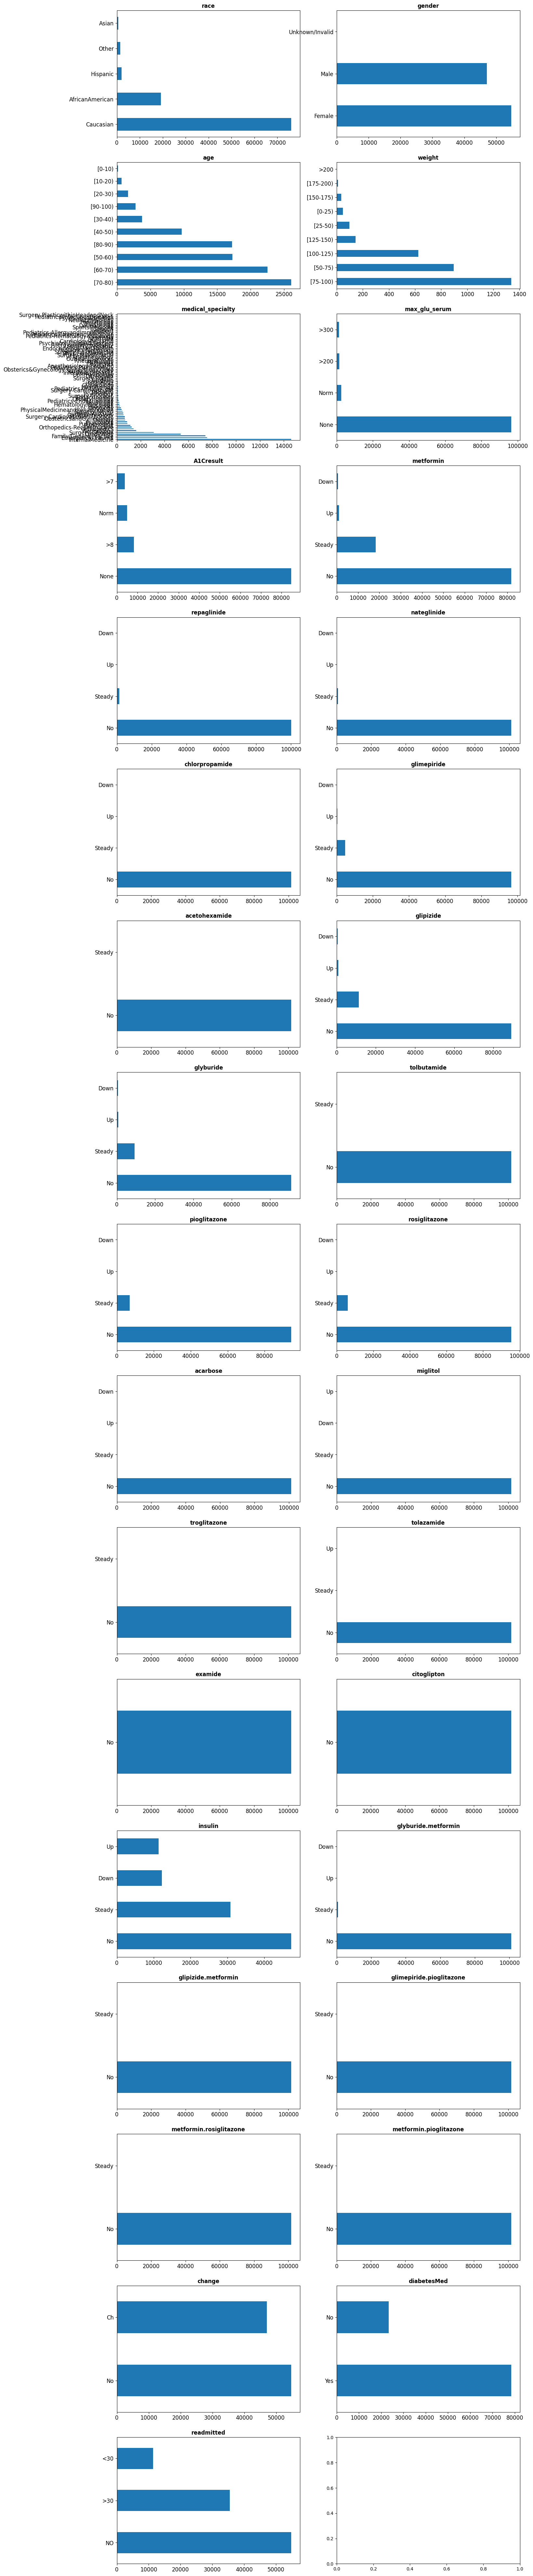

In [ ]:
graficos_eda_categoricos(df.select_dtypes('O'))

Conclusiones
  *  chlorpropamide
  *  acetohexamide
  *  tolbutamide
  *  miglitol
  *  acarbose
  *  tolazamide
  *  troglitazone
  * examide
  *  citoglipton
  * glimepiride.ploglitazone
  *  glimepiride.metformin
  * glimepiride.ploglitazone
  * metformin.pioglitazone
  * metformin.rosiglitazone


Estas Variables categoricas al tener un solo valor tiene que ser elimindas ya que generarian un segso en el analisis

In [ ]:
columnasAeliminar=["metformin.rosiglitazone","metformin.pioglitazone","glimepiride.pioglitazone","glipizide.metformin","citoglipton","examide","tolazamide","troglitazone","acarbose","miglitol","tolbutamide","acetohexamide","chlorpropamide"]
df.drop(columns =columnasAeliminar ,axis=1, inplace = True)

Aca Previamente se ve que race,Medical_specialty y el peso tiene variables NaN
por lo cual rellenamos con la tecnica de propagacion ffill

In [ ]:
df = df.where(~df.race.isnull(), df.fillna(axis=0, method='ffill'))
df = df.where(~df.medical_specialty.isnull(), df.fillna(axis=0, method='ffill'))
df["weight"]=df["weight"].fillna(df["weight"].mode()[0])


In [ ]:
label_encoder_age = LabelEncoder()
label_encoder_peso = LabelEncoder()
df['age_encoded'] = label_encoder_age.fit_transform(df['age'])
df['peso_encoded'] = label_encoder_peso.fit_transform(df['weight'])
df

,race,gender,age,weight,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,...,glyburide,pioglitazone,rosiglitazone,insulin,glyburide.metformin,change,diabetesMed,readmitted,age_encoded,peso_encoded
0,Caucasian,Female,[0-10),[75-100),1,Pediatrics-Endocrinology,41,0,1,0,...,No,No,No,No,No,No,No,NO,0,8
1,Caucasian,Female,[10-20),[75-100),3,Pediatrics-Endocrinology,59,0,18,0,...,No,No,No,Up,No,Ch,Yes,>30,1,8
2,AfricanAmerican,Female,[20-30),[75-100),2,Pediatrics-Endocrinology,11,5,13,2,...,No,No,No,No,No,No,Yes,NO,2,8
3,Caucasian,Male,[30-40),[75-100),2,Pediatrics-Endocrinology,44,1,16,0,...,No,No,No,Up,No,Ch,Yes,NO,3,8
4,Caucasian,Male,[40-50),[75-100),1,Pediatrics-Endocrinology,51,0,8,0,...,No,No,No,Steady,No,Ch,Yes,NO,4,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,AfricanAmerican,Male,[70-80),[150-175),3,Orthopedics,51,0,16,0,...,No,No,No,Down,No,Ch,Yes,>30,7,4
101762,AfricanAmerican,Female,[80-90),[150-175),5,Orthopedics,33,3,18,0,...,No,No,No,Steady,No,No,Yes,NO,8,4
101763,Caucasian,Male,[70-80),[150-175),1,Orthopedics,53,0,9,1,...,No,No,No,Down,No,Ch,Yes,NO,7,4
101764,Caucasian,Female,[80-90),[75-100),10,Surgery-General,45,2,21,0,...,No,Steady,No,Up,No,Ch,Yes,NO,8,8


In [ ]:
df.drop(columns=["age","weight"],axis=1,inplace=True)
df

,race,gender,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,...,glyburide,pioglitazone,rosiglitazone,insulin,glyburide.metformin,change,diabetesMed,readmitted,age_encoded,peso_encoded
0,Caucasian,Female,1,Pediatrics-Endocrinology,41,0,1,0,0,0,...,No,No,No,No,No,No,No,NO,0,8
1,Caucasian,Female,3,Pediatrics-Endocrinology,59,0,18,0,0,0,...,No,No,No,Up,No,Ch,Yes,>30,1,8
2,AfricanAmerican,Female,2,Pediatrics-Endocrinology,11,5,13,2,0,1,...,No,No,No,No,No,No,Yes,NO,2,8
3,Caucasian,Male,2,Pediatrics-Endocrinology,44,1,16,0,0,0,...,No,No,No,Up,No,Ch,Yes,NO,3,8
4,Caucasian,Male,1,Pediatrics-Endocrinology,51,0,8,0,0,0,...,No,No,No,Steady,No,Ch,Yes,NO,4,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,AfricanAmerican,Male,3,Orthopedics,51,0,16,0,0,0,...,No,No,No,Down,No,Ch,Yes,>30,7,4
101762,AfricanAmerican,Female,5,Orthopedics,33,3,18,0,0,1,...,No,No,No,Steady,No,No,Yes,NO,8,4
101763,Caucasian,Male,1,Orthopedics,53,0,9,1,0,0,...,No,No,No,Down,No,Ch,Yes,NO,7,4
101764,Caucasian,Female,10,Surgery-General,45,2,21,0,0,1,...,No,Steady,No,Up,No,Ch,Yes,NO,8,8


##EDA Variables Numericas

In [ ]:
def estadisticos_cont(num):
    #Calculamos describe
    estadisticos = num.describe().T
    #Añadimos la mediana
    estadisticos['median'] = num.median()
    #Reordenamos para que la mediana esté al lado de la media
    estadisticos = estadisticos.iloc[:,[0,1,8,2,3,4,5,6,7]]
    #Lo devolvemos
    return(estadisticos)

In [ ]:
estadisticos_cont(df.select_dtypes('number'))

,count,mean,median,std,min,25%,50%,75%,max
time_in_hospital,101754.0,4.396240,4.0,2.985163,1.0,2.0,4.0,6.0,14.0
num_lab_procedures,101754.0,43.098384,44.0,19.673078,1.0,31.0,44.0,57.0,132.0
num_procedures,101754.0,1.339839,1.0,1.705852,0.0,0.0,1.0,2.0,6.0
num_medications,101754.0,16.022613,15.0,8.127585,1.0,10.0,15.0,20.0,81.0
number_outpatient,101754.0,0.369401,0.0,1.267333,0.0,0.0,0.0,0.0,42.0
number_emergency,101754.0,0.197860,0.0,0.930525,0.0,0.0,0.0,0.0,76.0
number_inpatient,101754.0,0.635631,0.0,1.262920,0.0,0.0,0.0,1.0,21.0
number_diagnoses,101754.0,7.422588,8.0,1.933559,1.0,6.0,8.0,9.0,16.0


Generación de Insights

In [ ]:
df.diabetesMed.value_counts(normalize = True) * 100

Yes    77.009258
No     22.990742
Name: diabetesMed, dtype: float64

In [ ]:
# Transformar diabetesMed a numérica
df['diabetesMed'] = df.diabetesMed.map({'No':0, 'Yes':1})
df["change"]=df.change.map({"No":0,"Ch":1})

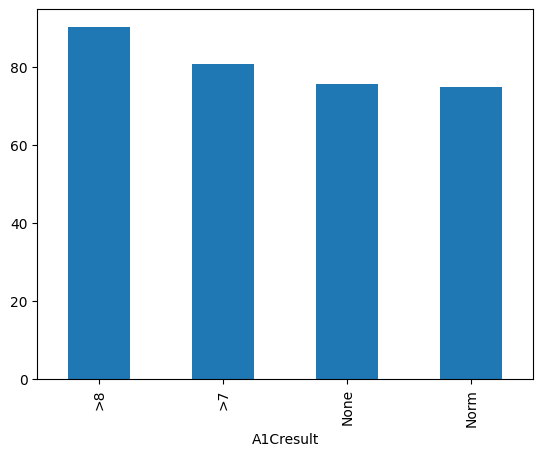

In [ ]:
# Analisis por Azucar en sangre
temp = df.groupby('A1Cresult').diabetesMed.mean().sort_values(ascending = False) * 100
temp.plot.bar();

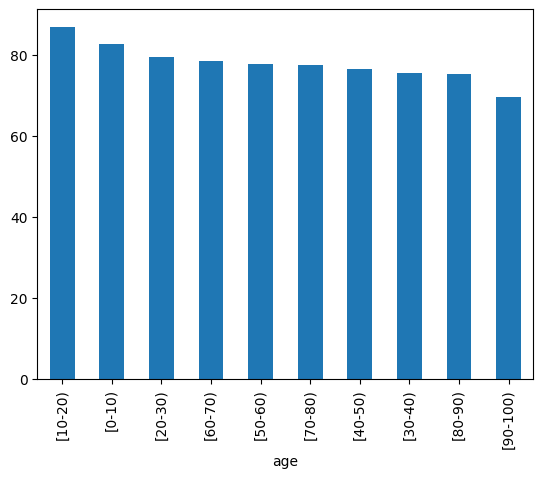

In [ ]:
# Analisis por Edad
temp = df.groupby('age').diabetesMed.mean().sort_values(ascending = False) * 100
temp.plot.bar();

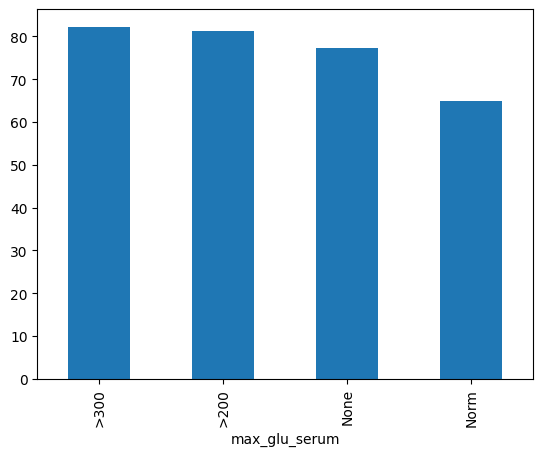

In [ ]:
# Analisis por Glusemia en Sangre
temp = df.groupby('max_glu_serum').diabetesMed.mean().sort_values(ascending = False) * 100
temp.plot.bar();

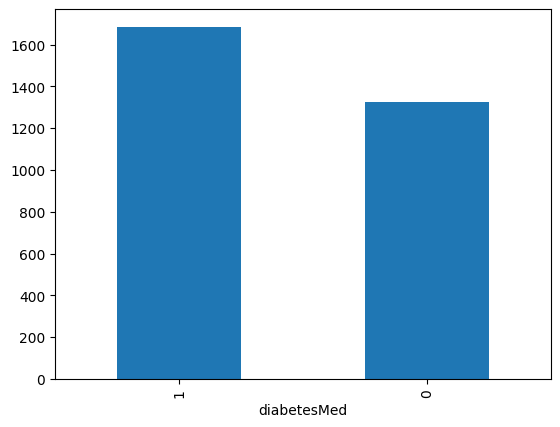

In [ ]:
# Analisis por Medicamentos
temp = df.groupby('diabetesMed').num_medications.mean().sort_values(ascending = False) * 100
temp.plot.bar();

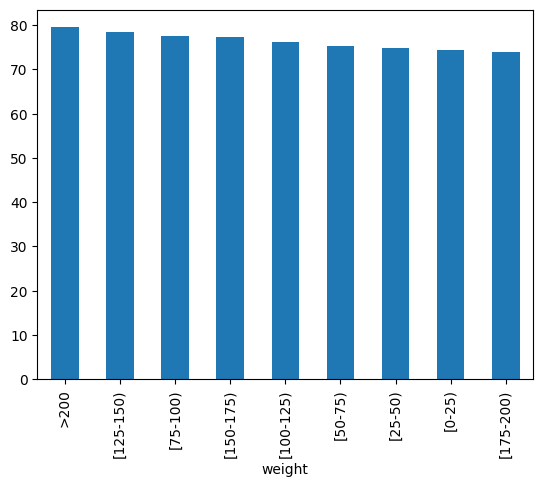

In [ ]:
# Analisis por Peso
temp = df.groupby('weight').diabetesMed.mean().sort_values(ascending = False) * 100
temp.plot.bar();

#Conclusion
--
La gente que podria desarrollar Diabetes cumple estas caracteristicas
  * A mayor Cantidad de medicamentos
  * Mayor Peso
  * Mayor niveles de Azucar en sangre
  * Mayores Niveles de Glusemia
  * En menores de Edades

<ipython-input-60-4efbf1129654>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=df.corr(), annot=True)


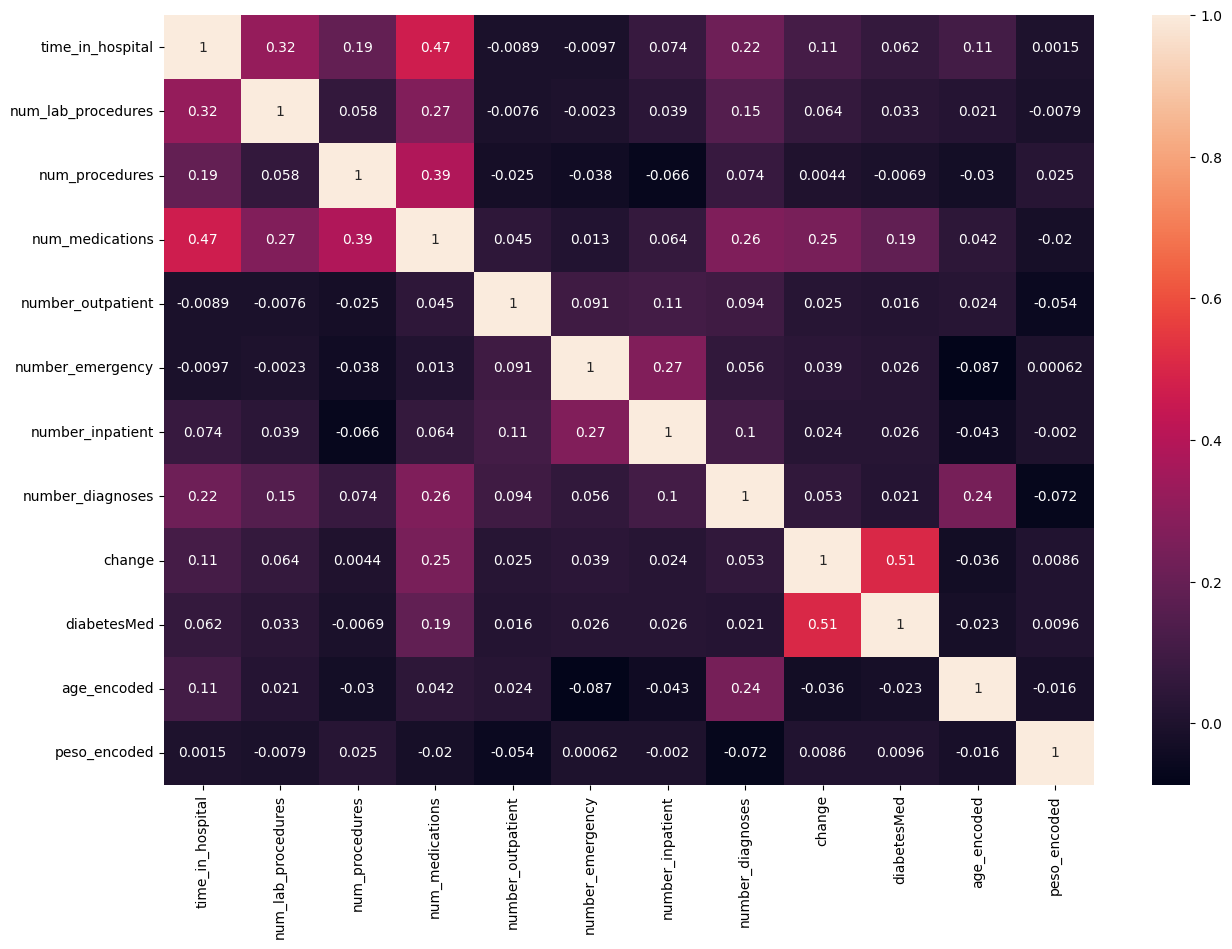

In [ ]:
sns.heatmap(data=df.corr(), annot=True)
fig=plt.gcf()
fig.set_size_inches(15,10)
plt.show()

#Modelos De Machine Learning

##Preparacion de Datos

###Transformacion de las Variables Categoricas


In [ ]:
df_ml = df.copy()

In [ ]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101754 entries, 0 to 101765
Data columns (total 28 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   race                 101754 non-null  object
 1   gender               101754 non-null  object
 2   time_in_hospital     101754 non-null  int64 
 3   medical_specialty    101754 non-null  object
 4   num_lab_procedures   101754 non-null  int64 
 5   num_procedures       101754 non-null  int64 
 6   num_medications      101754 non-null  int64 
 7   number_outpatient    101754 non-null  int64 
 8   number_emergency     101754 non-null  int64 
 9   number_inpatient     101754 non-null  int64 
 10  number_diagnoses     101754 non-null  int64 
 11  max_glu_serum        101754 non-null  object
 12  A1Cresult            101754 non-null  object
 13  metformin            101754 non-null  object
 14  repaglinide          101754 non-null  object
 15  nateglinide          101754 non-nu

In [ ]:
cat = df_ml.select_dtypes('O')
cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101754 entries, 0 to 101765
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   race                 101754 non-null  object
 1   gender               101754 non-null  object
 2   medical_specialty    101754 non-null  object
 3   max_glu_serum        101754 non-null  object
 4   A1Cresult            101754 non-null  object
 5   metformin            101754 non-null  object
 6   repaglinide          101754 non-null  object
 7   nateglinide          101754 non-null  object
 8   glimepiride          101754 non-null  object
 9   glipizide            101754 non-null  object
 10  glyburide            101754 non-null  object
 11  pioglitazone         101754 non-null  object
 12  rosiglitazone        101754 non-null  object
 13  insulin              101754 non-null  object
 14  glyburide.metformin  101754 non-null  object
 15  readmitted           101754 non-nu

In [ ]:
from sklearn.preprocessing import OneHotEncoder

#Instanciamos
onehot = OneHotEncoder(sparse_output = False)

#Entrenamos
onehot.fit(cat)

#Aplicamos
cat_ohe = onehot.transform(cat)

#Ponemos los nombres
cat_ohe = pd.DataFrame(cat_ohe, columns = onehot.get_feature_names_out(input_features = cat.columns)).reset_index(drop = True)

In [ ]:
cat_one=cat_ohe.drop(columns=["race_Other","gender_Unknown/Invalid"],axis=1,inplace=True)
cat_ohe

,race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,gender_Female,gender_Male,medical_specialty_AllergyandImmunology,medical_specialty_Anesthesiology,medical_specialty_Anesthesiology-Pediatric,medical_specialty_Cardiology,...,insulin_No,insulin_Steady,insulin_Up,glyburide.metformin_Down,glyburide.metformin_No,glyburide.metformin_Steady,glyburide.metformin_Up,readmitted_<30,readmitted_>30,readmitted_NO
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101749,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
101750,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
101751,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
101752,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


###Escalando Datos Numericos

In [ ]:
num = df_ml.select_dtypes('number').reset_index(drop=True)

In [ ]:
num.drop(columns = 'diabetesMed', inplace = True)

In [ ]:
num

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,change,age_encoded,peso_encoded
0,1,41,0,1,0,0,0,1,0,0,8
1,3,59,0,18,0,0,0,9,1,1,8
2,2,11,5,13,2,0,1,6,0,2,8
3,2,44,1,16,0,0,0,7,1,3,8
4,1,51,0,8,0,0,0,5,1,4,8
...,...,...,...,...,...,...,...,...,...,...,...
101749,3,51,0,16,0,0,0,9,1,7,4
101750,5,33,3,18,0,0,1,9,0,8,4
101751,1,53,0,9,1,0,0,13,1,7,4
101752,10,45,2,21,0,0,1,9,1,8,8


Estandarizacion

In [ ]:
from sklearn.preprocessing import StandardScaler

# Estandarización por Z-score
scaler = StandardScaler()
num_stan = pd.DataFrame(scaler.fit_transform(num), columns=num.columns)
num_stan

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,change,age_encoded,peso_encoded
0,-1.137712,-0.106663,-0.785441,-1.848358,-0.291480,-0.212633,-0.503305,-3.321658,-0.926692,-3.824960,0.489273
1,-0.467729,0.808297,-0.785441,0.243294,-0.291480,-0.212633,-0.503305,0.815812,1.079107,-3.197586,0.489273
2,-0.802721,-1.631597,2.145660,-0.371897,1.286644,-0.212633,0.288515,-0.735739,-0.926692,-2.570211,0.489273
3,-0.802721,0.045830,-0.199221,-0.002782,-0.291480,-0.212633,-0.503305,-0.218556,1.079107,-1.942836,0.489273
4,-1.137712,0.401648,-0.785441,-0.987089,-0.291480,-0.212633,-0.503305,-1.252923,1.079107,-1.315462,0.489273
...,...,...,...,...,...,...,...,...,...,...,...
101749,-0.467729,0.401648,-0.785441,-0.002782,-0.291480,-0.212633,-0.503305,0.815812,1.079107,0.566662,-1.526701
101750,0.202255,-0.513312,0.973220,0.243294,-0.291480,-0.212633,0.288515,0.815812,-0.926692,1.194037,-1.526701
101751,-1.137712,0.503310,-0.785441,-0.864051,0.497582,-0.212633,-0.503305,2.884547,1.079107,0.566662,-1.526701
101752,1.877213,0.096661,0.386999,0.612410,-0.291480,-0.212633,0.288515,0.815812,1.079107,1.194037,0.489273


Juntamos las variables categorícas codificadas con las variables numéricas escaladas:

In [ ]:
df_ml = pd.concat([cat_ohe,num_stan], axis = 1)
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101754 entries, 0 to 101753
Columns: 140 entries, race_AfricanAmerican to peso_encoded
dtypes: float64(140)
memory usage: 108.7 MB


##Diseño de Modelo

### Separación de Prediccion y Objetivo

X es el df
y la Y lo q queres precedir
El objetivo es Clasificar a las personas si tienen diabetes y las cuales no una Separacion

In [ ]:
X = df_ml
y = df['diabetesMed']

In [ ]:
len(X)

101754

In [ ]:
len(y)

101754

### A entrenar

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

###Ajuste Y Balanceo Usando SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE
# Verificar la distribución de clases antes de SMOTE
print("Antes de SMOTE:")
print(y_train.value_counts())

# Aplicar SMOTE solo al conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Verificar la distribución de clases después de SMOTE
print("\nDespués de SMOTE:")
print(y_resampled.value_counts())

Antes de SMOTE:
1    54940
0    16287
Name: diabetesMed, dtype: int64

Después de SMOTE:
1    54940
0    54940
Name: diabetesMed, dtype: int64


#Normalizacion

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Escalar datos numéricos
scaler = MinMaxScaler()
X_resampled_scaled = scaler.fit_transform(X_resampled)
X_test_scaled = scaler.transform(X_test)

Una vez escalado los datos buscamos los parametros importantes

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Crear el modelo
model_rf = RandomForestClassifier()

# Entrenar el modelo
model_rf.fit(X_resampled_scaled, y_resampled)

# Obtener importancia de características
feature_importances = model_rf.feature_importances_

In [ ]:
feature_importances

array([3.09926850e-04, 4.64979673e-05, 3.24798789e-04, 1.00353867e-04,
       3.34264569e-04, 3.10591874e-04, 2.98817837e-07, 8.09413038e-06,
       2.67141387e-06, 2.27986640e-04, 1.31302870e-06, 1.05206023e-06,
       2.24953472e-07, 0.00000000e+00, 3.99632246e-04, 2.03652169e-05,
       2.43270740e-06, 2.57670481e-04, 6.65576413e-05, 6.75428169e-06,
       1.91511556e-05, 5.80442744e-05, 2.25155482e-05, 5.63175262e-06,
       4.37999247e-04, 1.22819164e-04, 4.24663945e-05, 3.05858649e-10,
       2.61508913e-06, 8.81907660e-06, 4.96758607e-05, 5.03021897e-05,
       5.61010590e-06, 1.40307503e-04, 9.75267737e-05, 1.61967373e-05,
       3.12069088e-05, 1.02654690e-05, 5.74815792e-06, 3.75299767e-05,
       3.88305441e-08, 4.07450362e-05, 0.00000000e+00, 5.19746676e-05,
       5.71571668e-07, 0.00000000e+00, 1.38556400e-06, 9.00512821e-06,
       0.00000000e+00, 6.84702252e-05, 6.18061856e-06, 1.46870148e-05,
       0.00000000e+00, 1.25819934e-04, 0.00000000e+00, 2.09366209e-06,
      

# Entrenamiento y Prediccion de Modelos

##Funcion para ver las metricas

In [ ]:
# Métricas y desempeño
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay # Grafica Matrix de confusión

In [ ]:
def plot_confusion_matrix(y_true, y_preds, labels=None, model_name=None, normalize=None):
    """
    Función para graficar la Matrix de confusión
    y_true: vector de salida real
    y_predic: vector de salida predicho por el modelo
    labels: opcional, para nombrar las clases. Lista con strings
    model_name: opcional, para poner un título al gráfico
    normalize: {'true', 'pred', 'all'}, default=None
        Normalizes confusion matrix over the true (rows), predicted (columns)
        conditions or all the population. If None, confusion matrix will not be
        normalized.
    """
    if normalize:
        cm = confusion_matrix(y_true, y_preds, normalize=normalize)
    else:
        cm = confusion_matrix(y_true, y_preds)
    cmd = ConfusionMatrixDisplay(cm, display_labels=labels)
    cmd.plot()
    cmd.ax_.set(xlabel='Clase Predicha', ylabel='Clase Real')
    if model_name:
        cmd.ax_.set(title=model_name)

In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, roc_auc_score, matthews_corrcoef # Diferentes métricas, hay más. Según el problema conviene mirar alguna o varias
import time

# DataFrame para una evaluación general al final
model_performance = pd.DataFrame(columns=['Accuracy','Recall','Precision','F1-Score','MCC score','Time to Train','Time to Predict','Total Time'])

def muestra_metricas(model_name, y_test, y_predic, start_time=None, end_train_time=None, end_predict_time=None):
    """
    Función simple para personalizar las métrica a imprimir para cada modelo analizado.
    model_name: string con el nombre del modelo
    y_test: recibe el vector de salida real
    y_predic: recibe el vector de salida predicho por el modelo
    """

    accuracy = accuracy_score(y_test, y_predic)
    recall = recall_score(y_test, y_predic, average='weighted') # average permite definir cómo se computan estas métricas para múltiples clases de salida
    precision = precision_score(y_test, y_predic, average='weighted')
    f1s = f1_score(y_test, y_predic, average='weighted')
    MCC = matthews_corrcoef(y_test, y_predic)

    print("#######################################")
    print("Accuracy: "+ "{:.2%}".format(accuracy))
    print("Recall: "+ "{:.2%}".format(recall))
    print("Precision: "+ "{:.2%}".format(precision))
    print("F1-Score: "+ "{:.2%}".format(f1s))
    print("MCC: "+ "{:.2%}".format(MCC))    # Matthews correlation coefficient: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.matthews_corrcoef.html

    if (start_time != None and end_train_time != None and end_predict_time != None):
        print("Tiempo de entrenamiento: {:.4f} s".format(end_train_time-start_time))
        print("Tiempo de predicción: {:.4f} s".format(end_predict_time-end_train_time))
        print("Tiempo total: {:.4f} s".format(end_predict_time-start_time))

    print("#######################################")
    model_performance.loc[model_name] = [accuracy, recall, precision, f1s, MCC, end_train_time-start_time, end_predict_time-end_train_time, end_predict_time-start_time]

In [ ]:
labels = ['Diabetes_No', 'Diabetes_Si']

##Regresion Logistica

In [ ]:
from sklearn.linear_model import LogisticRegression

start = time.time() # Estampa de tiempo para computar métricas

# Entrenamiento
lr_clf = LogisticRegression()
lr_clf.fit(X_resampled_scaled, y_resampled)
end_train = time.time()

# Predicciones
pred_lr = lr_clf.predict(X_test_scaled)
end_predict = time.time()

print("Classification Report: \n", classification_report(y_test, pred_lr))
muestra_metricas("LogisticRegression", y_test, pred_lr, start, end_train, end_predict)

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      7107
           1       1.00      1.00      1.00     23420

    accuracy                           1.00     30527
   macro avg       1.00      1.00      1.00     30527
weighted avg       1.00      1.00      1.00     30527

#######################################
Accuracy: 99.91%
Recall: 99.91%
Precision: 99.91%
F1-Score: 99.91%
MCC: 99.73%
Tiempo de entrenamiento: 4.6096 s
Tiempo de predicción: 0.0079 s
Tiempo total: 4.6175 s
#######################################


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


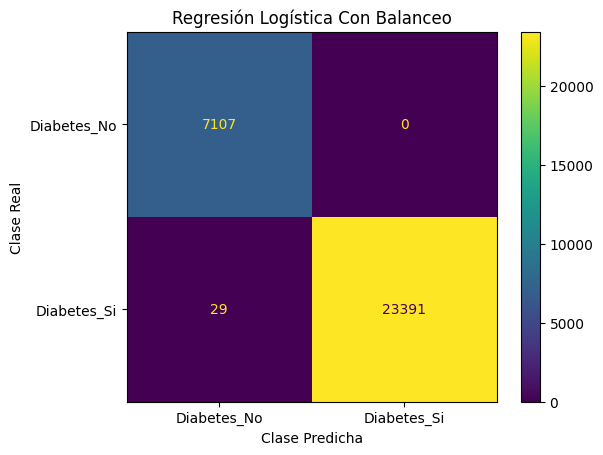

In [ ]:
# Gráfica de la Matriz de confusión
plot_confusion_matrix(y_test, pred_lr, labels=labels, model_name="Regresión Logística Con Balanceo")

## Árbol de Decisión de Decisión

In [ ]:
from sklearn.tree import DecisionTreeClassifier

start = time.time() # Estampa de tiempo para computar métricas

# Entrenamiento
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_resampled_scaled, y_resampled)
end_train = time.time()

# Predicciones
pred_tree = tree_clf.predict(X_test_scaled)
end_predict = time.time()

print("Classification Report: \n", classification_report(y_test, pred_tree))
muestra_metricas("DecisionTreeClassifier con Balanceo", y_test, pred_tree, start, end_train, end_predict)

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      7107
           1       1.00      1.00      1.00     23420

    accuracy                           1.00     30527
   macro avg       1.00      1.00      1.00     30527
weighted avg       1.00      1.00      1.00     30527

#######################################
Accuracy: 99.72%
Recall: 99.72%
Precision: 99.72%
F1-Score: 99.72%
MCC: 99.22%
Tiempo de entrenamiento: 2.2448 s
Tiempo de predicción: 0.0106 s
Tiempo total: 2.2554 s
#######################################


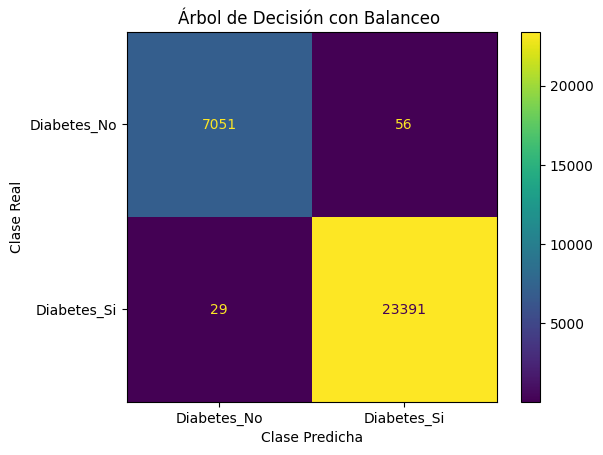

In [ ]:
plot_confusion_matrix(y_test, pred_tree, labels=labels, model_name="Árbol de Decisión con Balanceo ")

##KVecinos Cercanos

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

start = time.time() # Estampa de tiempo para computar métricas

# Entrenamiento
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_resampled_scaled, y_resampled)
end_train = time.time()

# Predicciones
pred_knn = knn_clf.predict(X_test_scaled)
end_predict = time.time()

print("Classification Report: \n", classification_report(y_test, pred_knn))
muestra_metricas("KNeighborsClassifier Con Balanceo", y_test, pred_knn, start, end_train, end_predict)

Classification Report: 
               precision    recall  f1-score   support

           0       0.95      1.00      0.98      7107
           1       1.00      0.98      0.99     23420

    accuracy                           0.99     30527
   macro avg       0.98      0.99      0.98     30527
weighted avg       0.99      0.99      0.99     30527

#######################################
Accuracy: 98.84%
Recall: 98.84%
Precision: 98.89%
F1-Score: 98.85%
MCC: 96.85%
Tiempo de entrenamiento: 0.0748 s
Tiempo de predicción: 61.0646 s
Tiempo total: 61.1394 s
#######################################


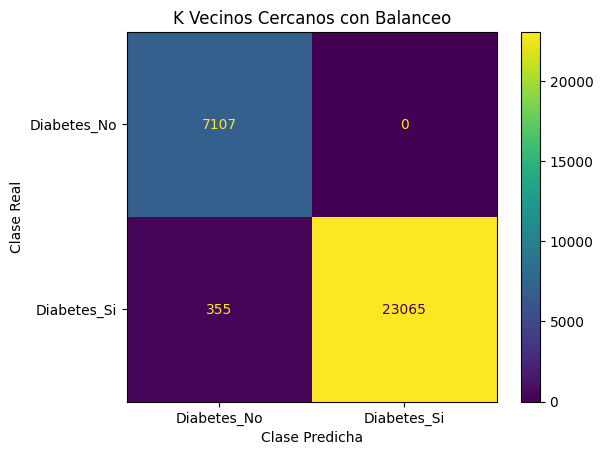

In [ ]:
plot_confusion_matrix(y_test, pred_knn, labels=labels, model_name="K Vecinos Cercanos con Balanceo")

###Red Neuronal

In [ ]:
from sklearn.neural_network import MLPClassifier # Multi-layer Perceptron classifier

start = time.time() # Estampa de tiempo para computar métricas

# Entrenamiento
# Por ahora... un perceptrón multicapa simple, después vemos topologías complejas
nn_clf = MLPClassifier((20,))  # hidden_layer_sizes : tuple, length = n_layers - 2, default=(100,)
                                # The ith element represents the number of neurons in the ith hidden layer.
nn_clf.fit(X_resampled_scaled, y_resampled)
end_train = time.time()

# Predicciones
pred_nn = nn_clf.predict(X_test_scaled)
end_predict = time.time()

print("Classification Report: \n", classification_report(y_test, pred_nn))
muestra_metricas("Multi-layer Perceptron classifier con Balanceo", y_test, pred_nn, start, end_train, end_predict)

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      7107
           1       1.00      1.00      1.00     23420

    accuracy                           1.00     30527
   macro avg       1.00      1.00      1.00     30527
weighted avg       1.00      1.00      1.00     30527

#######################################
Accuracy: 99.91%
Recall: 99.91%
Precision: 99.91%
F1-Score: 99.91%
MCC: 99.73%
Tiempo de entrenamiento: 15.4342 s
Tiempo de predicción: 0.0400 s
Tiempo total: 15.4742 s
#######################################


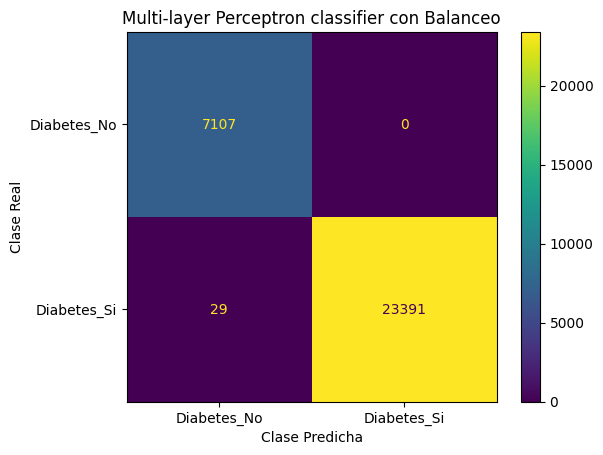

In [ ]:
plot_confusion_matrix(y_test, pred_nn, labels=labels, model_name="Multi-layer Perceptron classifier con Balanceo")

###XGBClassifier

In [ ]:
from xgboost import XGBClassifier
start = time.time()

xgbc_clf = XGBClassifier()

xgbc_clf.fit(X_resampled_scaled, y_resampled)

end_train = time.time()

pred_XBGC = xgbc_clf.predict(X_test_scaled)

end_predict = time.time()

print("XGBC classificator", classification_report(y_test, pred_XBGC))
muestra_metricas("XGBC classificator Con Balanceo", y_test, pred_XBGC, start, end_train, end_predict)

XGBC classificator               precision    recall  f1-score   support

           0       1.00      1.00      1.00      7107
           1       1.00      1.00      1.00     23420

    accuracy                           1.00     30527
   macro avg       1.00      1.00      1.00     30527
weighted avg       1.00      1.00      1.00     30527

#######################################
Accuracy: 99.90%
Recall: 99.90%
Precision: 99.90%
F1-Score: 99.90%
MCC: 99.72%
Tiempo de entrenamiento: 6.2101 s
Tiempo de predicción: 0.0983 s
Tiempo total: 6.3084 s
#######################################


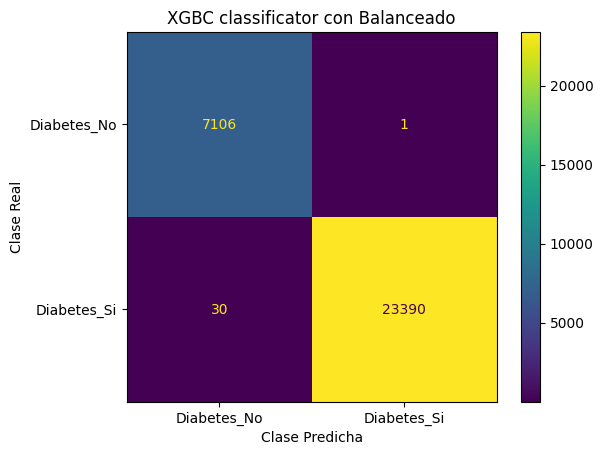

In [ ]:
plot_confusion_matrix(y_test, pred_XBGC, labels=labels, model_name="XGBC classificator con Balanceado")

#Busqueda de Hiperparámetros

##Bibliotecas a usar

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from scipy.stats import uniform

##Busqueda De Hiperparámetros en la RedNeuronal

In [ ]:
# Definir el espacio de búsqueda de hiperparámetros
param_dist = {
    'hidden_layer_sizes': [(10,), (20,)],
    'alpha': [1e-3, 1e-4],
}

# Realizar búsqueda de hiperparámetros aleatoria
random_search = RandomizedSearchCV(nn_clf, param_distributions=param_dist, n_iter=10, verbose=3)
random_search.fit(X_resampled_scaled, y_resampled)

# Ver los mejores hiperparámetros
print("Mejores hiperparámetros:", random_search.best_params_)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END alpha=0.001, hidden_layer_sizes=(10,);, score=0.999 total time=   9.7s
[CV 2/5] END alpha=0.001, hidden_layer_sizes=(10,);, score=0.999 total time=  10.3s
[CV 3/5] END alpha=0.001, hidden_layer_sizes=(10,);, score=0.999 total time=   7.9s
[CV 4/5] END alpha=0.001, hidden_layer_sizes=(10,);, score=0.999 total time=  15.0s
[CV 5/5] END alpha=0.001, hidden_layer_sizes=(10,);, score=0.999 total time=  10.2s
[CV 1/5] END alpha=0.001, hidden_layer_sizes=(20,);, score=0.999 total time=  11.6s
[CV 2/5] END alpha=0.001, hidden_layer_sizes=(20,);, score=0.999 total time=   8.8s
[CV 3/5] END alpha=0.001, hidden_layer_sizes=(20,);, score=0.999 total time=  10.7s
[CV 4/5] END alpha=0.001, hidden_layer_sizes=(20,);, score=0.999 total time=  18.5s
[CV 5/5] END alpha=0.001, hidden_layer_sizes=(20,);, score=0.999 total time=  19.8s
[CV 1/5] END alpha=0.0001, hidden_layer_sizes=(10,);, score=0.999 total time=  20.3s
[CV 2/5] END al

###Mejorando Los Hiperparametros de la red Neuronal

In [ ]:
start = time.time()
# Reconfigurar el modelo con los mejores hiperparámetros encontrados
best_modelNN = MLPClassifier(hidden_layer_sizes=(10,), alpha= 0.0001)
# Entrenar el modelo con los datos de entrenamiento
best_modelNN.fit(X_resampled_scaled, y_resampled)

end_train = time.time()

prediccion = best_modelNN.predict(X_test_scaled)

end_predict = time.time()

# Imprimir métricas de clasificación
print("Classification Report: \n", classification_report(y_test, prediccion))
muestra_metricas("Multi-layer Perceptron classifier con el Mejor ajuste", y_test, prediccion, start, end_train, end_predict)

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      7107
           1       1.00      1.00      1.00     23420

    accuracy                           1.00     30527
   macro avg       1.00      1.00      1.00     30527
weighted avg       1.00      1.00      1.00     30527

#######################################
Accuracy: 99.91%
Recall: 99.91%
Precision: 99.91%
F1-Score: 99.91%
MCC: 99.73%
Tiempo de entrenamiento: 23.3605 s
Tiempo de predicción: 0.0782 s
Tiempo total: 23.4387 s
#######################################


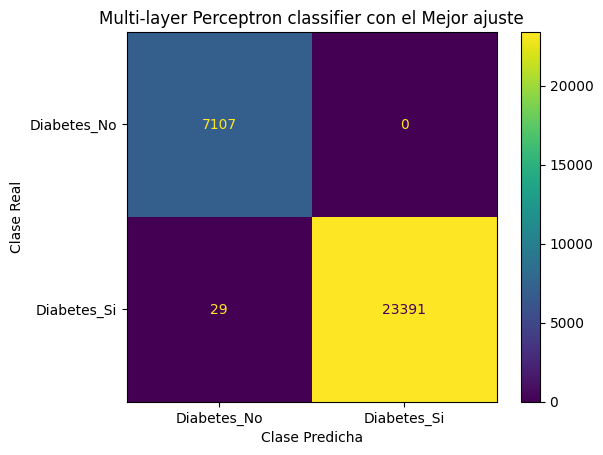

In [ ]:
plot_confusion_matrix(y_test, prediccion, labels=labels, model_name="Multi-layer Perceptron classifier con el Mejor ajuste")

##Mejorando Los Hiperparametros de La Regresion Logistica

In [ ]:
param_dist_lr = {'C': uniform(0.1, 100), 'penalty': ['l2']}

# Realizar búsqueda de hiperparámetros aleatoria
random_search_lr = RandomizedSearchCV(lr_clf, param_distributions=param_dist_lr, n_iter=10, cv=5, verbose=3)
random_search_lr.fit(X_resampled_scaled, y_resampled)

# Ver los mejores hiperparámetros
print("Mejores hiperparámetros para Regresión Logística:", random_search_lr.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5] END ...C=21.34565559341297, penalty=l2;, score=0.999 total time=   7.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5] END ...C=21.34565559341297, penalty=l2;, score=0.999 total time=   7.9s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5] END ...C=21.34565559341297, penalty=l2;, score=0.999 total time=   9.5s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5] END ...C=21.34565559341297, penalty=l2;, score=0.999 total time=   6.3s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END ...C=21.34565559341297, penalty=l2;, score=0.999 total time=   8.3s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5] END ....C=89.1007629726265, penalty=l2;, score=0.999 total time=   5.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5] END ....C=89.1007629726265, penalty=l2;, score=0.999 total time=   4.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5] END ....C=89.1007629726265, penalty=l2;, score=0.999 total time=   4.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5] END ....C=89.1007629726265, penalty=l2;, score=0.999 total time=   2.9s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END ....C=89.1007629726265, penalty=l2;, score=0.999 total time=   3.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5] END ...C=7.972857398376953, penalty=l2;, score=0.999 total time=   3.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5] END ...C=7.972857398376953, penalty=l2;, score=0.999 total time=   4.5s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5] END ...C=7.972857398376953, penalty=l2;, score=0.999 total time=   2.9s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5] END ...C=7.972857398376953, penalty=l2;, score=0.999 total time=   2.9s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END ...C=7.972857398376953, penalty=l2;, score=0.999 total time=   2.9s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5] END ...C=68.09668622841392, penalty=l2;, score=0.999 total time=   4.5s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5] END ...C=68.09668622841392, penalty=l2;, score=0.999 total time=   3.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5] END ...C=68.09668622841392, penalty=l2;, score=0.999 total time=   3.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5] END ...C=68.09668622841392, penalty=l2;, score=0.999 total time=   3.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END ...C=68.09668622841392, penalty=l2;, score=0.999 total time=   4.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5] END ...C=81.53900246360674, penalty=l2;, score=0.999 total time=   3.5s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5] END ...C=81.53900246360674, penalty=l2;, score=0.999 total time=   3.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5] END ...C=81.53900246360674, penalty=l2;, score=0.999 total time=   3.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5] END ...C=81.53900246360674, penalty=l2;, score=0.999 total time=   3.9s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END ...C=81.53900246360674, penalty=l2;, score=0.999 total time=   3.9s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5] END ..C=32.083072119704894, penalty=l2;, score=0.999 total time=   3.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5] END ..C=32.083072119704894, penalty=l2;, score=0.999 total time=   3.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5] END ..C=32.083072119704894, penalty=l2;, score=0.999 total time=   3.4s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5] END ..C=32.083072119704894, penalty=l2;, score=0.999 total time=   4.3s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END ..C=32.083072119704894, penalty=l2;, score=0.999 total time=   2.9s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5] END ..C=10.085369438880653, penalty=l2;, score=0.999 total time=   3.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5] END ..C=10.085369438880653, penalty=l2;, score=0.999 total time=   3.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5] END ..C=10.085369438880653, penalty=l2;, score=0.999 total time=   5.6s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5] END ..C=10.085369438880653, penalty=l2;, score=0.999 total time=   3.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END ..C=10.085369438880653, penalty=l2;, score=0.999 total time=   2.9s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5] END ..C=28.334054807524634, penalty=l2;, score=0.999 total time=   3.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5] END ..C=28.334054807524634, penalty=l2;, score=0.999 total time=   4.7s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5] END ..C=28.334054807524634, penalty=l2;, score=0.999 total time=   2.9s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5] END ..C=28.334054807524634, penalty=l2;, score=0.999 total time=   3.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END ..C=28.334054807524634, penalty=l2;, score=0.999 total time=   2.9s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5] END ..C=27.415122611420717, penalty=l2;, score=0.999 total time=   4.7s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5] END ..C=27.415122611420717, penalty=l2;, score=0.999 total time=   3.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5] END ..C=27.415122611420717, penalty=l2;, score=0.999 total time=   3.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5] END ..C=27.415122611420717, penalty=l2;, score=0.999 total time=   3.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END ..C=27.415122611420717, penalty=l2;, score=0.999 total time=   4.3s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5] END ...C=34.75158031689657, penalty=l2;, score=0.999 total time=   3.5s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5] END ...C=34.75158031689657, penalty=l2;, score=0.999 total time=   3.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5] END ...C=34.75158031689657, penalty=l2;, score=0.999 total time=   3.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5] END ...C=34.75158031689657, penalty=l2;, score=0.999 total time=   4.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END ...C=34.75158031689657, penalty=l2;, score=0.999 total time=   4.1s
Mejores hiperparámetros para Regresión Logística: {'C': 21.34565559341297, 'penalty': 'l2'}


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


###Mejorando Los Hiperparametros de la Regresion Logistica

In [ ]:
#{'C': 62.2582836287933, 'penalty': 'l2'}
start = time.time() # Estampa de tiempo para computar métricas

# Entrenamiento
lr_mejora = LogisticRegression(C=25.70503620150645, penalty='l2')
lr_mejora.fit(X_resampled_scaled, y_resampled)
end_train = time.time()

# Predicciones
prediccionMejorada = lr_mejora.predict(X_test_scaled)
end_predict = time.time()
print("Classification Report: \n", classification_report(y_test, prediccionMejorada))
muestra_metricas("Regresion Logistica con el Mejor ajuste", y_test, prediccionMejorada, start, end_train, end_predict)

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      7039
           1       1.00      1.00      1.00     23488

    accuracy                           1.00     30527
   macro avg       1.00      1.00      1.00     30527
weighted avg       1.00      1.00      1.00     30527

#######################################
Accuracy: 99.88%
Recall: 99.88%
Precision: 99.88%
F1-Score: 99.88%
MCC: 99.66%
Tiempo de entrenamiento: 5.6958 s
Tiempo de predicción: 0.0084 s
Tiempo total: 5.7041 s
#######################################


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


##Busqueda De Los Hiperparámetros de Arbol de decision

In [ ]:
# Definir el espacio de búsqueda de hiperparámetros
param_dist_dt = {'max_depth': [None, 10, 20, 30, 40], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}

# Realizar búsqueda de hiperparámetros aleatoria
random_search_dt = RandomizedSearchCV(tree_clf, param_distributions=param_dist_dt, n_iter=10, cv=5, verbose=3)
random_search_dt.fit(X_resampled_scaled, y_resampled)

# Ver los mejores hiperparámetros
print("Mejores hiperparámetros para Árboles de Decisión:", random_search_dt.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END max_depth=40, min_samples_leaf=1, min_samples_split=2;, score=0.993 total time=   3.1s
[CV 2/5] END max_depth=40, min_samples_leaf=1, min_samples_split=2;, score=0.997 total time=   2.8s
[CV 3/5] END max_depth=40, min_samples_leaf=1, min_samples_split=2;, score=0.999 total time=   3.1s
[CV 4/5] END max_depth=40, min_samples_leaf=1, min_samples_split=2;, score=0.999 total time=   3.2s
[CV 5/5] END max_depth=40, min_samples_leaf=1, min_samples_split=2;, score=0.999 total time=   2.5s
[CV 1/5] END max_depth=None, min_samples_leaf=1, min_samples_split=10;, score=0.997 total time=   3.1s
[CV 2/5] END max_depth=None, min_samples_leaf=1, min_samples_split=10;, score=0.999 total time=   2.7s
[CV 3/5] END max_depth=None, min_samples_leaf=1, min_samples_split=10;, score=0.999 total time=   3.5s
[CV 4/5] END max_depth=None, min_samples_leaf=1, min_samples_split=10;, score=0.999 total time=   2.9s
[CV 5/5] END max_depth=None

###Implemenando Las Mejoras al Modelo

In [ ]:
start = time.time() # Estampa de tiempo para computar métricas

# Entrenamiento
tree_clf_merjorado = DecisionTreeClassifier(min_samples_split=10,min_samples_leaf=4,max_depth=20)
tree_clf_merjorado.fit(X_resampled_scaled, y_resampled)
end_train = time.time()

# Predicciones
pred_tree_mejora = tree_clf_merjorado.predict(X_test_scaled)
end_predict = time.time()

print("Classification Report: \n", classification_report(y_test, pred_tree_mejora))
muestra_metricas("DecisionTreeClassifier Mejorado", y_test, pred_tree_mejora, start, end_train, end_predict)

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      7107
           1       1.00      1.00      1.00     23420

    accuracy                           1.00     30527
   macro avg       1.00      1.00      1.00     30527
weighted avg       1.00      1.00      1.00     30527

#######################################
Accuracy: 99.90%
Recall: 99.90%
Precision: 99.90%
F1-Score: 99.90%
MCC: 99.73%
Tiempo de entrenamiento: 1.6519 s
Tiempo de predicción: 0.0090 s
Tiempo total: 1.6608 s
#######################################


##Busqueda de Hiperparámetros del KVecinos Cercanos

In [ ]:
param_distributions__knn = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance']}
random_search_knc = RandomizedSearchCV(knn_clf, param_distributions=param_distributions__knn, cv=5, verbose=3)
random_search_knc.fit(X_resampled_scaled, y_resampled)

# Ver los mejores hiperparámetros
print("Mejores hiperparámetros para KVecinos Cercanos:", random_search_knc.best_params_)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END ....n_neighbors=3, weights=uniform;, score=0.980 total time=  27.4s
[CV 2/5] END ....n_neighbors=3, weights=uniform;, score=0.976 total time=  27.6s
[CV 3/5] END ....n_neighbors=3, weights=uniform;, score=0.978 total time=  27.5s
[CV 4/5] END ....n_neighbors=3, weights=uniform;, score=0.977 total time=  27.0s
[CV 5/5] END ....n_neighbors=3, weights=uniform;, score=0.976 total time=  25.7s
[CV 1/5] END ...n_neighbors=3, weights=distance;, score=0.982 total time=  25.7s
[CV 2/5] END ...n_neighbors=3, weights=distance;, score=0.978 total time=  26.2s
[CV 3/5] END ...n_neighbors=3, weights=distance;, score=0.980 total time=  28.5s
[CV 4/5] END ...n_neighbors=3, weights=distance;, score=0.980 total time=  26.2s
[CV 5/5] END ...n_neighbors=3, weights=distance;, score=0.980 total time=  24.1s
[CV 1/5] END ....n_neighbors=5, weights=uniform;, score=0.973 total time=  27.7s
[CV 2/5] END ....n_neighbors=5, weights=uniform;,

###Ajustes

In [ ]:
#Mejores hiperparámetros para KVecinos Cercanos: {'weights': 'distance', 'n_neighbors': 3}

start = time.time() # Estampa de tiempo para computar métricas

# Entrenamiento
knn_clf_mejorado = KNeighborsClassifier(weights="distance",n_neighbors=3)
knn_clf_mejorado.fit(X_resampled_scaled, y_resampled)
end_train = time.time()

# Predicciones
pred_knn_mejorado = knn_clf_mejorado.predict(X_test_scaled)
end_predict = time.time()

print("Classification Report: \n", classification_report(y_test, pred_knn_mejorado))
muestra_metricas("KNeighborsClassifier Mejorado", y_test, pred_knn_mejorado, start, end_train, end_predict)


Classification Report: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      7107
           1       1.00      0.99      0.99     23420

    accuracy                           0.99     30527
   macro avg       0.98      0.99      0.99     30527
weighted avg       0.99      0.99      0.99     30527

#######################################
Accuracy: 99.18%
Recall: 99.18%
Precision: 99.20%
F1-Score: 99.18%
MCC: 97.75%
Tiempo de entrenamiento: 0.0735 s
Tiempo de predicción: 46.6294 s
Tiempo total: 46.7029 s
#######################################


##Busqueda de Hiperparámetros del XGBC

In [ ]:
param_search_xgboost = {'learning_rate': [0.01, 0.1, 0.2], 'n_estimators': [100, 200, 300], 'max_depth': [3, 4, 5]}
random_search_xgbc = RandomizedSearchCV(xgbc_clf, param_distributions=param_search_xgboost, cv=5, verbose=3)
random_search_xgbc.fit(X_resampled_scaled, y_resampled)

# Ver los mejores hiperparámetros
print("Mejores hiperparámetros para XGBC:", random_search_xgbc.best_params_)

###Aplicando las mejoras

In [ ]:
#Mejores hiperparámetros para XGBC: {'n_estimators': 300, 'max_depth': 3, 'learning_rate': 0.2}
start = time.time()
xgbc_clf_mejorad=XGBClassifier(n_estimators=300,max_depth=3,learning_rate=0.2)

xgbc_clf_mejorad.fit(X_resampled_scaled, y_resampled)

end_train = time.time()

pred_mejorado = xgbc_clf.predict(X_test_scaled)

end_predict = time.time()

print("XGBC classificator", classification_report(y_test, pred_mejorado))
muestra_metricas("XGBC classificator Mejorado", y_test, pred_mejorado, start, end_train, end_predict)


XGBC classificator               precision    recall  f1-score   support

           0       1.00      1.00      1.00      7107
           1       1.00      1.00      1.00     23420

    accuracy                           1.00     30527
   macro avg       1.00      1.00      1.00     30527
weighted avg       1.00      1.00      1.00     30527

#######################################
Accuracy: 99.90%
Recall: 99.90%
Precision: 99.90%
F1-Score: 99.90%
MCC: 99.72%
Tiempo de entrenamiento: 7.8019 s
Tiempo de predicción: 0.1697 s
Tiempo total: 7.9716 s
#######################################


##Busqueda de Hiperparámetros del SVC

El SVC tiene un alto coste a nivel computacional debido a la gran cantidad de Datos que se le estan inyectando y a los datos cruzados por lo cual en la busqueda de los mejores parametros este tardaria aproximadamente mas de 6hs yendo a casos reales no se puede esperar 6hs para el analisis de las mejores parametros



#Vemos Si el dataset esta desbalanceado en nuestra variable Target(DiabetesMed)

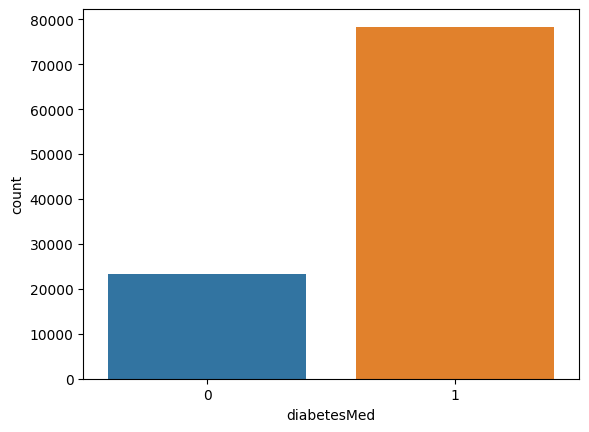

1    78360
0    23394
Name: diabetesMed, dtype: int64

In [ ]:
sns.countplot(x='diabetesMed', data=df)  # Reemplaza 'clase' con el nombre de tu variable objetivo#
plt.show()
#df.head(2)
df.diabetesMed.value_counts()

#Exploracion del Rendimiento De Los Modelos

Esta Parte van a estar todos los modelos y tambien sus respectivas Mejoras

In [ ]:
model_performance.fillna(.90,inplace=True)
model_performance.style.background_gradient(cmap='coolwarm').format({'Accuracy': '{:.2%}',
                                                                     'Precision': '{:.2%}',
                                                                     'Recall': '{:.2%}',
                                                                     'F1-Score': '{:.2%}',
                                                                     'MCC score': '{:.2%}',
                                                                     'Time to Train':'{:.3f}',
                                                                     'Time to Predict':'{:.3f}',
                                                                     'Total Time':'{:.3f}',
                                                                     })

,Accuracy,Recall,Precision,F1-Score,MCC score,Time to Train,Time to Predict,Total Time
LogisticRegression,99.91%,99.91%,99.91%,99.91%,99.73%,4.610,0.008,4.617
DecisionTreeClassifier con Balanceo,99.72%,99.72%,99.72%,99.72%,99.22%,2.245,0.011,2.255
KNeighborsClassifier Con Balanceo,98.84%,98.84%,98.89%,98.85%,96.85%,0.075,61.065,61.139
Multi-layer Perceptron classifier con Balanceo,99.91%,99.91%,99.91%,99.91%,99.73%,15.434,0.040,15.474
XGBC classificator Con Balanceo,99.90%,99.90%,99.90%,99.90%,99.72%,6.210,0.098,6.308
Multi-layer Perceptron classifier con el Mejor ajuste,99.91%,99.91%,99.91%,99.91%,99.73%,23.360,0.078,23.439
DecisionTreeClassifier Mejorado,99.90%,99.90%,99.90%,99.90%,99.73%,1.652,0.009,1.661
KNeighborsClassifier Mejorado,99.18%,99.18%,99.20%,99.18%,97.75%,0.074,46.629,46.703
XGBC classificator Mejorado,99.90%,99.90%,99.90%,99.90%,99.72%,7.802,0.170,7.972


pd:No se que ha pasado pero ahora funciona "mal" en el sentido de que da todo 99porciento la semana pasada me ha dado 78% no se si es quizas la normalizacion

#Conclusion Final
Una vez visto la "mejoras" las cuales tiene el balanceo y los mejores hiperparametros
Casos A favores: Arboles de Decision ,Kvecionas Cercanos y  y XGBC(Son arboles de decision pero mas pequeños) Gano Velocidad
Casos en que empeoro el rendimiento:Regresion Logistica, Rede Neuronales gano Presicion pero acoste de MCC score,

Para mi el que estuvo mejor parado para esta clasificacion es el XGBC ya que su vercion mejorada tuvo un muy buen desempeño, se ve reflejado en el tiempo que tardo pasando de 8seg a 1seg lo cual siempre viene bien,


Visualizacion

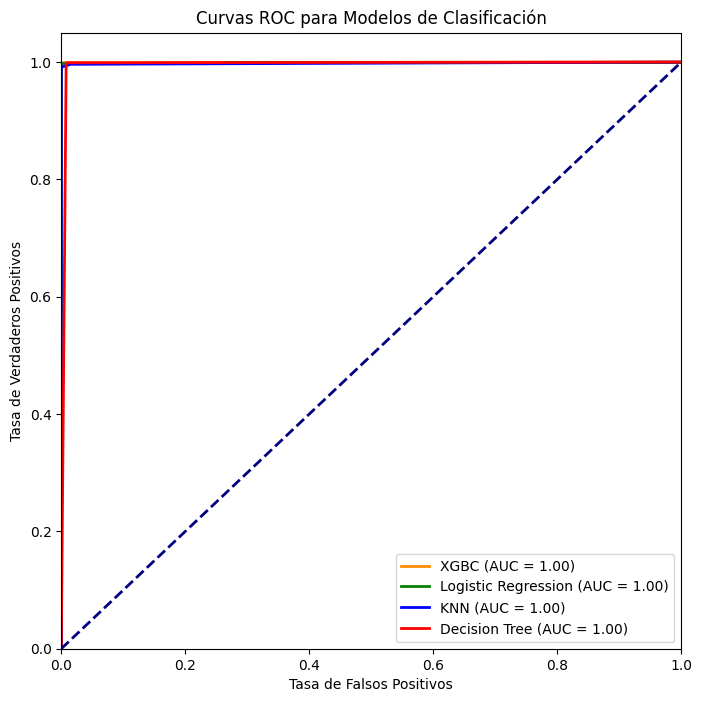

In [ ]:
from sklearn.metrics import roc_curve, auc
# Aca saco los Datos probabilisticos sobre el entrenamiento para luego mostrarlo por pantanlla
y_pred_proba_xgbc = xgbc_clf.predict_proba(X_test_scaled)[:, 1]
y_pred_proba_logreg = lr_clf.predict_proba(X_test_scaled)[:, 1]
y_pred_proba_knn = knn_clf.predict_proba(X_test_scaled)[:, 1]
y_pred_proba_tree_cls = tree_clf.predict_proba(X_test_scaled)[:, 1]


# Calcular la curva ROC y el AUC para cada modelo
fpr_xgbc, tpr_xgbc, _ = roc_curve(y_test, y_pred_proba_xgbc)
roc_auc_xgbc = auc(fpr_xgbc, tpr_xgbc)

fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_pred_proba_logreg)
roc_auc_logreg = auc(fpr_logreg, tpr_logreg)

fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred_proba_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

fpr_tree_cls, tpr_tree_cls, _ = roc_curve(y_test, y_pred_proba_tree_cls)
roc_auc_tree_cls = auc(fpr_tree_cls, tpr_tree_cls)

# Graficar las curvas ROC
plt.figure(figsize=(8, 8))

plt.plot(fpr_xgbc, tpr_xgbc, color='darkorange', lw=2, label=f'XGBC (AUC = {roc_auc_xgbc:.2f})')
plt.plot(fpr_logreg, tpr_logreg, color='green', lw=2, label=f'Logistic Regression (AUC = {roc_auc_logreg:.2f})')
plt.plot(fpr_knn, tpr_knn, color='blue', lw=2, label=f'KNN (AUC = {roc_auc_knn:.2f})')
plt.plot(fpr_tree_cls, tpr_tree_cls, color='red', lw=2, label=f'Decision Tree (AUC = {roc_auc_tree_cls:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curvas ROC para Modelos de Clasificación')
plt.legend(loc="lower right")

plt.show()